### IMPORTATION DES PACK

In [9]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTATION DE L'HISTORIQUE DES COMMANDEs, des produits,des clients

In [10]:
produits = pd.read_csv("C:/Users/aldio/OneDrive/Documents/ProjetValorisationD/ProjetValorisationDonnees/Semaine7/produit.csv")
clients = pd.read_csv("C:/Users/aldio/OneDrive/Documents/ProjetValorisationD/ProjetValorisationDonnees/Semaine7/clients.csv")
commandes = pd.read_csv("C:/Users/aldio/OneDrive/Documents/ProjetValorisationD/ProjetValorisationDonnees/Semaine7/commandes.csv")
lignescommande = pd.read_csv("C:/Users/aldio/OneDrive/Documents/ProjetValorisationD/ProjetValorisationDonnees/Semaine7/lignescommande.csv")
categories = pd.read_csv("C:/Users/aldio/OneDrive/Documents/ProjetValorisationD/ProjetValorisationDonnees/Semaine7/categories.csv")

### FAISONS LA JOINTURE ENTRE LES DIFFERENT TABLES DE LA BD

In [11]:
ecommerce = pd.merge(commandes, clients, how='inner', on ='idClient')
ecommerce1 = pd.merge(produits, lignescommande, how= 'inner')
ecommerce2 = pd.merge(produits, categories, how='inner')
ecoommece3 =  pd.merge(produits, lignescommande, how='inner')

In [12]:
# Correction de la jointure avec LignesCommande
ecommerce1 = pd.merge(produits, lignescommande, how='inner', left_on='idProduit', right_on='idProduit')


### EDA 

In [13]:
ecommerce1.describe()


,idProduit,prix,poids,idCategories,idcommande,noLigne,quantite
count,2.993900e+04,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000,29939.000000
mean,1.040611e+08,26.466883,1.806628,4044.952403,14970.000000,2.006213,2.502388
std,4.506548e+08,46.753969,2.723082,3074.362247,8642.789191,0.816091,1.119916
min,0.000000e+00,0.000000,0.010000,5.000000,1.000000,1.000000,1.000000
25%,0.000000e+00,12.000000,0.750000,557.000000,7485.500000,1.000000,2.000000
50%,5.000000e+00,12.000000,0.750000,5206.000000,14970.000000,2.000000,2.000000
75%,1.700000e+02,21.000000,1.100000,7119.000000,22454.500000,3.000000,4.000000
max,2.147484e+09,741.000000,10.000000,7351.000000,29939.000000,3.000000,4.000000


In [14]:
ecommerce1.head()
print(ecommerce1.columns.values)

['idProduit' 'nomProduit' 'prix' 'poids' 'idCategories' 'idcommande'
 'noLigne' 'quantite']


### Les 20 produits les plus vendus

###   SELECT p.nomProduit, SUM(lc.quantite) AS TotalQuantiteVendue
###   FROM Produit p
###   JOIN LignesCommande lc ON p.idProduit = lc.idProduit
###   GROUP BY p.nomProduit
###   ORDER BY TotalQuantiteVendue DESC
###   LIMIT 20;

### Avec Pandas

In [15]:
# Groupement par produit et calcul de la somme des quantités vendues
top_products = ecommerce1.groupby('nomProduit')['quantite'].sum().reset_index()

# Tri par quantité vendue de manière décroissante
top_products = top_products.sort_values(by='quantite', ascending=False)

# Sélection des 20 premiers produits
top_20_products = top_products.head(20)

# Affichage des résultats
print(top_20_products)



                                            nomProduit  quantite
392  WWE Massive Belt Banners - Airnormous WWE Unit...     30429
153  Guardian Kids Bikes Ethos. 16/20/24 Inch, Mult...      3433
355  Strathmore (27-140 STR-27-140 30 Sheet Kids Br...      2090
377  The Kids Room by Stupell Scatter Sunshine All ...      1887
204   Loew-Cornell 842 25-Piece Foam Brush Set, 1-Inch      1849
63   Crayola Gel FX Washable Markers, 80 ct., 10 Ea...      1721
296  Riverside 3D Construction Paper, Green, 9 x 12...      1686
77   Darice Chenille Stems (100pc), Red – Perfect f...      1467
245  Mr. Sketch 1951331 Scented Twistable Crayons, ...      1444
271               Perler 42766 Bead Bucket, Multicolor      1414
40             Bella Tunno Konrad Koala Happy Sidekick      1265
336  Rubie's Unisex-Adults Day Of The Dead Mask Wit...       358
97   Dress Up America Little Red Gingham Chef Hat-K...       314
363  SunWorks Construction Paper, Dark Blue, 12 x 1...       312
277  Perler Beads Fuse Be

## Visualisation

C:\Users\aldio\AppData\Local\Temp\ipykernel_3332\3158640921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantite', y='nomProduit', data=top_20_products, palette=['red', 'blue', 'orange', 'green'])
C:\Users\aldio\AppData\Local\Temp\ipykernel_3332\3158640921.py:3: UserWarning: 
The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='quantite', y='nomProduit', data=top_20_products, palette=['red', 'blue', 'orange', 'green'])


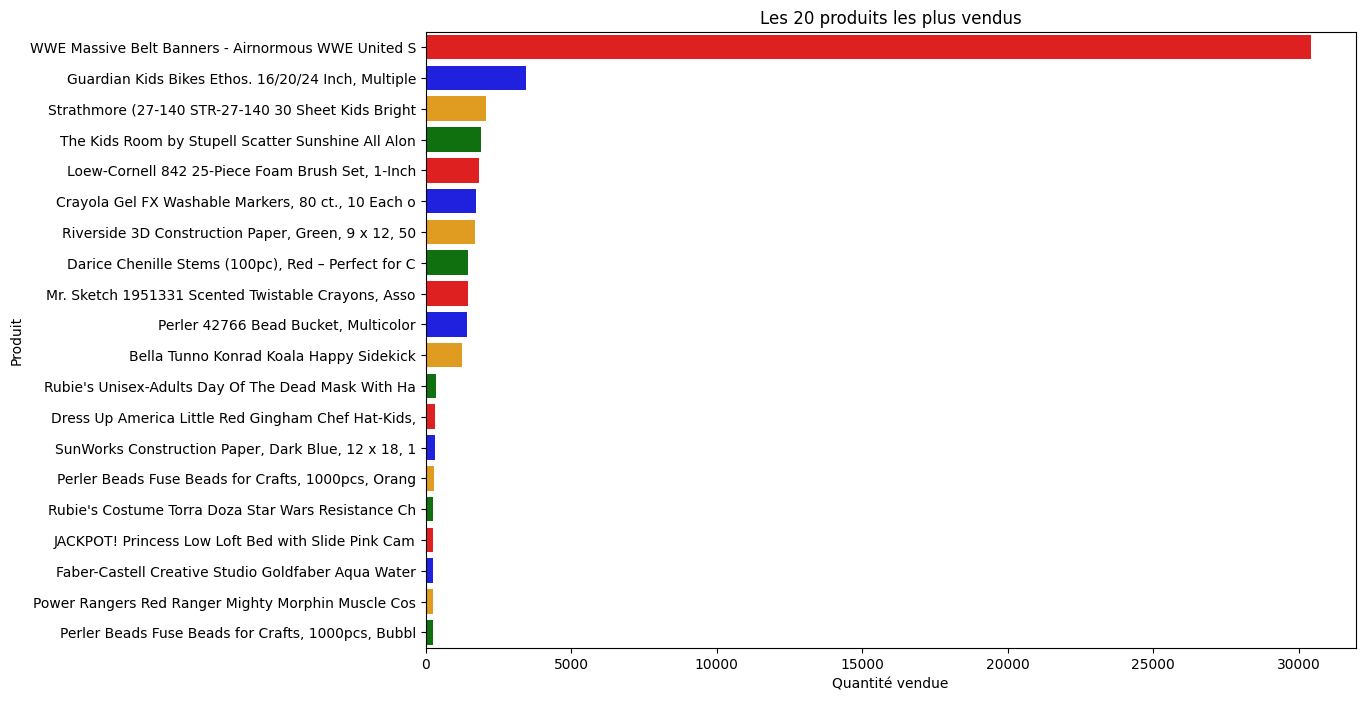

In [16]:
# Visualisation avec seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='quantite', y='nomProduit', data=top_20_products, palette=['red', 'blue', 'orange', 'green'])
plt.title('Les 20 produits les plus vendus')
plt.xlabel('Quantité vendue')
plt.ylabel('Produit')
plt.show()


## Nombre de produits par categorie

# SELECT nomCategorie, COUNT(idProduit) AS NombreDeProduits
# FROM Produit
# JOIN Categories ON Produit.idCategories = Categories.idCategories
# GROUP BY nomCategorie;

#### J'ai utiliser la jointure entre 'produits' et 'categories'(ecommerce2), et je calcule nombre de produits dans chaque catégorie en utilisant la méthode `value_counts()` et crée un histogramme à barres.

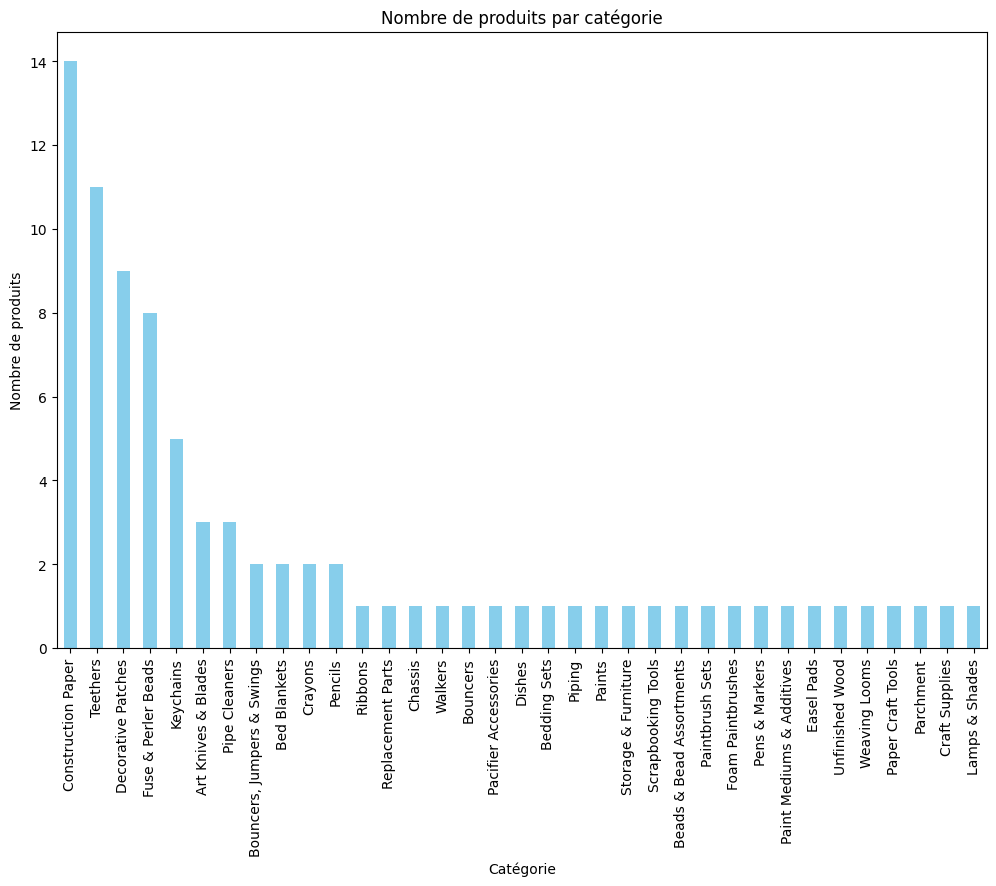

In [17]:

# Nombre de produits par catégorie
ecommerce2 = ecommerce2['nomCategorie'].value_counts()

# Affichage de l'histogramme
plt.figure(figsize=(12, 8))
ecommerce2.plot(kind='bar', color='skyblue')
plt.title('Nombre de produits par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produits')
plt.show()



## Top 10 des produits les plus vendus sans utiliser LIMIT
## nomProduit, QuantiteVendue
## FROM (
##     SELECT nomProduit, SUM(quantite) AS QuantiteVendue,
##            ROW_NUMBER() OVER (ORDER BY SUM(quantite) DESC) AS RowNum
##     FROM ecoommece3
##     GROUP BY nomProduit
## ) AS RankedProducts
## WHERE RowNum <= 10;


## J'ai exploité le dataframe "ecommerce3" pour déterminer les 10 produits avec les quantités les plus élevées. En les triant par ordre décroissant, j'ai créé un diagramme à barres illustrant le top 10 des produits les plus vendus en termes de quantité.

C:\Users\aldio\AppData\Local\Temp\ipykernel_3332\1953520535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantite', y='nomProduit', data=top_produits_vendus, palette='Blues')


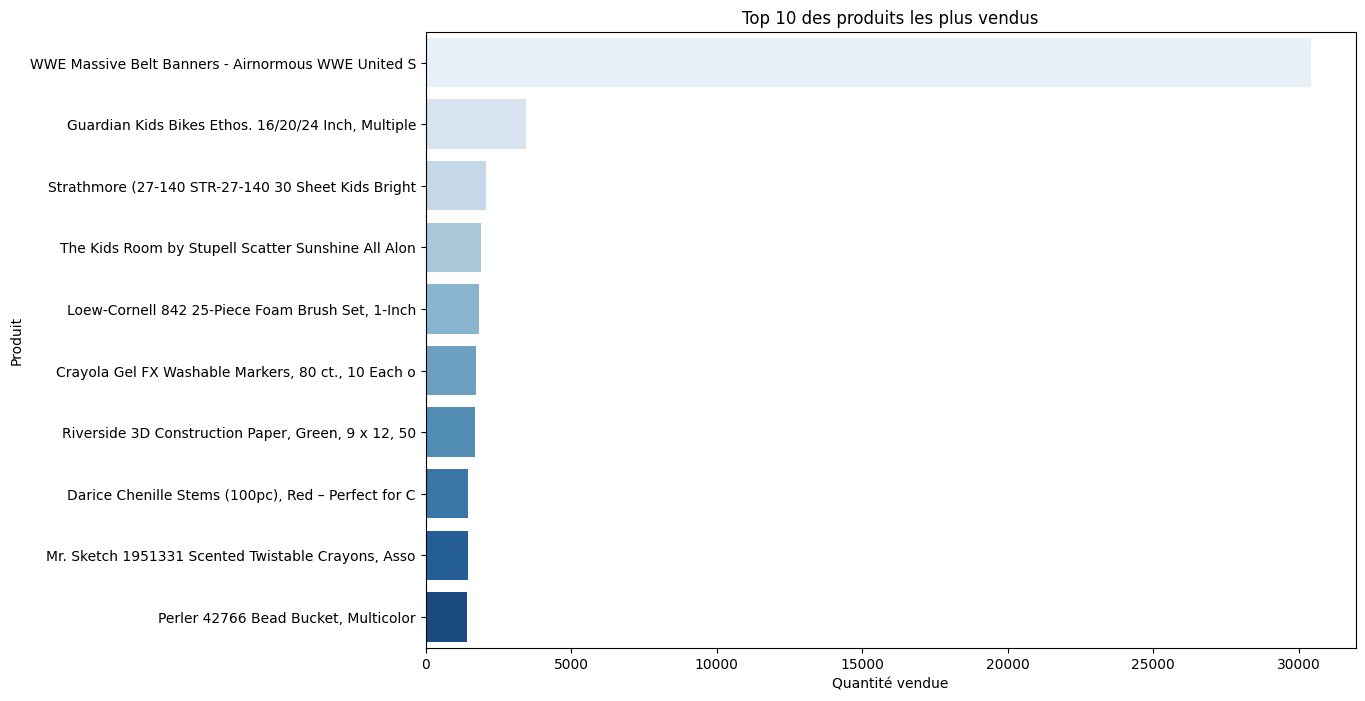

In [18]:
top_produits_vendus = ecoommece3.groupby('nomProduit')['quantite'].sum().reset_index().sort_values(by='quantite', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='quantite', y='nomProduit', data=top_produits_vendus, palette='Blues')
plt.title('Top 10 des produits les plus vendus')
plt.xlabel('Quantité vendue')
plt.ylabel('Produit')
plt.show()